# Changing color space

In [2]:
import cv2 as cv
import numpy as np

# Baca gambar
img = cv.imread(cv.samples.findFile("opencv-logo.png"))

# Pastikan gambar terbaca
if img is None:
    print("Gambar tidak ditemukan!")
    exit()

# Ubah ke grayscale
gray = cv.cvtColor(img, cv.COLOR_BGR2HSV)

# Tampilkan
cv.imshow('gray', gray)
cv.waitKey(0)
cv.destroyAllWindows()

# Object tracking

In [ ]:
import cv2 as cv
import numpy as np

cap = cv.VideoCapture(0)

while(1):

    # Take each frame
    _, frame = cap.read()

    # Convert BGR to HSV
    hsv = cv.cvtColor(frame, cv.COLOR_BGR2HSV)

    # define range of blue color in HSV (it is different with BGR)
    lower_blue = np.array([110,50,50])
    upper_blue = np.array([130,255,255])

    # Threshold the HSV image to get only blue colors
    mask = cv.inRange(hsv, lower_blue, upper_blue)

    # Bitwise-AND mask and original image
    res = cv.bitwise_and(frame,frame, mask= mask)

    cv.imshow('frame',frame)
    cv.imshow('mask',mask)
    cv.imshow('res',res)
    k = cv.waitKey(5) & 0xFF
    if k == 27:
        break

cv.destroyAllWindows()

In [6]:
green = np.uint8([[[0,0,255 ]]])
hsv_green = cv.cvtColor(green,cv.COLOR_BGR2HSV)
print( hsv_green )

#this is to find the HSV value of something

[[[  0 255 255]]]


# Multiple colors simultaneously

In [9]:
import cv2 as cv
import numpy as np

cap = cv.VideoCapture(0)

while(1):

    # Take each frame
    _, frame = cap.read()

    # Convert BGR to HSV
    hsv = cv.cvtColor(frame, cv.COLOR_BGR2HSV)

    # BLUE
    lower_blue = np.array([100, 150, 0])
    upper_blue = np.array([140, 255, 255])
    mask_blue = cv.inRange(hsv, lower_blue, upper_blue)

    # GREEN
    lower_green = np.array([40, 40, 40])
    upper_green = np.array([70, 255, 255])
    mask_green = cv.inRange(hsv, lower_green, upper_green)

    # RED (dua range)
    lower_red1 = np.array([0, 120, 70])
    upper_red1 = np.array([10, 255, 255])
    mask_red1 = cv.inRange(hsv, lower_red1, upper_red1)

    lower_red2 = np.array([170, 120, 70])
    upper_red2 = np.array([180, 255, 255])
    mask_red2 = cv.inRange(hsv, lower_red2, upper_red2)

    mask_red = mask_red1 + mask_red2
    
    mask_all = mask_blue | mask_red | mask_green

    # Bitwise-AND mask and original image
    res = cv.bitwise_and(frame,frame, mask= mask_all)

    cv.imshow('frame',frame)
    cv.imshow('mask',mask_all)
    cv.imshow('res',res)
    k = cv.waitKey(5) & 0xFF
    if k == 27:
        break

cv.destroyAllWindows()

# Transformations

## Scaling

In [13]:
import numpy as np
import cv2 as cv

img = cv.imread("opencv-logo.png")
assert img is not None, "error"

res = cv.resize(img, None, fx=5, fy=5, interpolation=cv.INTER_CUBIC)

cv.imshow("something", res)
cv.waitKey(0)
cv.destroyAllWindows()

## Translation

In [15]:
import numpy as np
import cv2 as cv

img = cv.imread('opencv-logo.png', cv.IMREAD_GRAYSCALE)
assert img is not None, "error"

rows, cols = img.shape

M = np.float32([[1,0,100],[0,1,50]])
dst = cv.warpAffine(img, M, (cols, rows))

cv.imshow('img', img)
cv.imshow('dst', dst)
cv.waitKey(0)
cv.destroyAllWindows()

## Rotation

In [17]:
import numpy as np
import cv2 as cv

img = cv.imread('opencv-logo.png', cv.IMREAD_GRAYSCALE)
assert img is not None, "error"
rows, cols = img.shape

M = cv.getRotationMatrix2D(((cols-1)/2.0,(rows-1)/2.0), 90,1)
dst = cv.warpAffine(img, M, (cols,rows))

cv.imshow('img', img)
cv.imshow('dst', dst)
cv.waitKey(0)
cv.destroyAllWindows()

## Affine transformation

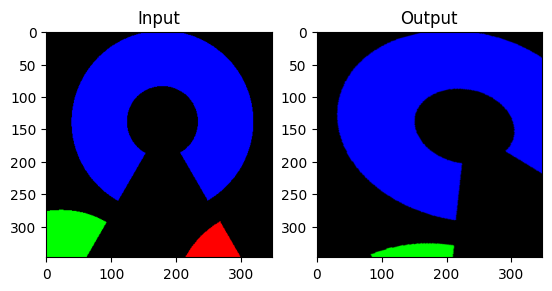

In [18]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

img = cv.imread('opencv-logo.png')
assert img is not None, "file could not be read, check with os.path.exists()"
rows,cols,ch = img.shape
 
pts1 = np.float32([[50,50],[200,50],[50,200]])
pts2 = np.float32([[10,100],[200,50],[100,250]])
 
M = cv.getAffineTransform(pts1,pts2)
 
dst = cv.warpAffine(img,M,(cols,rows))
 
plt.subplot(121),plt.imshow(img),plt.title('Input')
plt.subplot(122),plt.imshow(dst),plt.title('Output')
plt.show()

## Perspective transformation

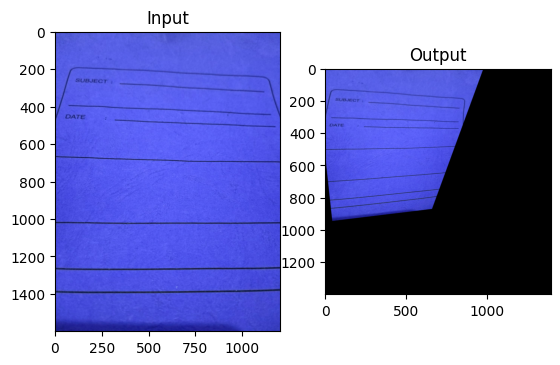

In [20]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

img = cv.imread('redthing.jpeg')
assert img is not None, "file could not be read, check with os.path.exists()"
rows,cols,ch = img.shape
 
pts1 = np.float32([[56,65],[368,52],[28,387],[389,390]])
pts2 = np.float32([[0,0],[300,0],[0,300],[300,300]])
 
M = cv.getPerspectiveTransform(pts1,pts2)
 
dst = cv.warpPerspective(img,M,(1400,1400))
 
plt.subplot(121),plt.imshow(img),plt.title('Input')
plt.subplot(122),plt.imshow(dst),plt.title('Output')
plt.show()